In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 
              'id':str, 'sqft_lot':int, 'view':int}

In [3]:
df_sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
df_train = pd.read_csv('kc_house_train_data.csv', dtype=dtype_dict)
df_test = pd.read_csv('kc_house_test_data.csv', dtype=dtype_dict)

In [4]:
def get_data(data, features, target):
    out_df = pd.DataFrame(data[features])
    out_df['constant'] = 1
    
    return (out_df[['constant'] + features], pd.DataFrame(data[target]))

In [5]:
def predict_output(feature_matrix, weights):
    return np.dot(feature_matrix, weights).reshape(-1,1)

In [6]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    if (feature_is_constant): return 2 * np.sum(errors)
    
    dRSSdw = 2 * np.sum(errors * feature)
    dL2dw = 2 * l2_penalty * weight
    
    return dRSSdw + dL2dw

In [7]:
example_features, example_output = get_data(df_sales, ['sqft_living'], 'price')
my_weights = np.array([1., 10.]).reshape(-1,1)
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output # prediction errors

#next two lines should print the same values
print(feature_derivative_ridge(errors, example_features.iloc[:,1].values.reshape(-1,1), my_weights[1], 1, False))
print(np.dot(example_features.iloc[:,1].values.reshape(-1,1).T, errors).squeeze()*2+20.)

#next two lines should print the same values
print(feature_derivative_ridge(errors, example_features.iloc[:,0].values.reshape(-1,1), my_weights[0], 1, True))
print(np.sum(errors)*2.)

price   -5.655417e+13
dtype: float64
-56554166815950.0
price   -2.244675e+10
dtype: float64
price   -2.244675e+10
dtype: float64


In [8]:
def ridge_regression_gradient_descent(feature_matrix, target, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights)
    
    for _ in range(max_iterations):
        predictions = predict_output(feature_matrix, weights)

        errors = predictions - target
        
        for i in range(len(weights)):
            column = feature_matrix.iloc[:, i].values.reshape(-1,1)
            
            weights[i] = weights[i] - step_size*feature_derivative_ridge(
                errors, 
                column, 
                weights[i], 
                l2_penalty, 
                i==0,
            ) 
              
    return weights

In [9]:
simple_features = ['sqft_living']
my_target = 'price'
(simple_feature_matrix, target) = get_data(df_train, simple_features, my_target)
(simple_test_feature_matrix, test_target) = get_data(df_test, simple_features, my_target)

In [10]:
step_size = 1e-12
max_iterations = 1000
initial_weights = np.zeros((simple_feature_matrix.shape[1],1))

In [11]:
simple_weights_0_penalty = ridge_regression_gradient_descent(
    simple_feature_matrix, 
    target, 
    initial_weights,
    step_size,
    0.0,
    max_iterations,
)

simple_weights_0_penalty

array([[-1.63113515e-01],
       [ 2.63024369e+02]])

In [12]:
simple_weights_high_penalty = ridge_regression_gradient_descent(
    simple_feature_matrix, 
    target, 
    initial_weights,
    step_size,
    1e11,
    max_iterations,
)

simple_weights_high_penalty

array([[  9.76730382],
       [124.57217567]])

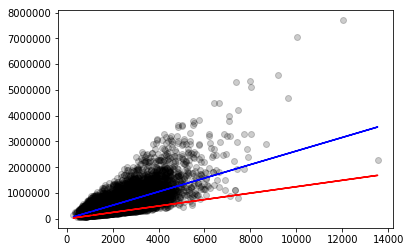

In [13]:
fig, ax = plt.subplots()

ax.scatter(x=df_train['sqft_living'], y=df_train['price'], c='black', alpha=0.2)

ax.plot(df_train['sqft_living'], predict_output(simple_feature_matrix, simple_weights_0_penalty), color='blue')

ax.plot(df_train['sqft_living'], predict_output(simple_feature_matrix, simple_weights_high_penalty), color='red')

plt.show()

<hr>

**Quiz Question: What is the value of the coefficient for sqft_living that you learned with no regularization, rounded to 1 decimal place? What about the one with high regularization?**

**Quiz Question: Comparing the lines you fit with the with no regularization versus high regularization, which one is steeper?**

<hr>

In [14]:
def rss(y, y_hat): 
    return np.dot((y - y_hat).T, (y - y_hat))

In [15]:
rss_0 = rss(test_target, predict_output(simple_test_feature_matrix, initial_weights))
rss_low = rss(test_target, predict_output(simple_test_feature_matrix, simple_weights_0_penalty))
rss_high = rss(test_target, predict_output(simple_test_feature_matrix, simple_weights_high_penalty))

print('0 weights: {}\nlow: {}\nhigh: {}'.format(rss_0, rss_low, rss_high))

0 weights: [[1.78427329e+15]]
low: [[2.75723632e+14]]
high: [[6.94642101e+14]]


<hr>

**Quiz Question: What are the RSS on the test data for each of the set of weights above (initial, no regularization, high regularization)?**

<hr>

In [16]:
model_features = ['sqft_living', 'sqft_living15']
my_target = 'price'
(feature_matrix, target) = get_data(df_train, model_features, my_target)
(test_feature_matrix, test_target) = get_data(df_test, model_features, my_target)

In [17]:
step_size = 1e-12
max_iterations = 1000
initial_weights = np.zeros((feature_matrix.shape[1],1))

In [18]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(
    feature_matrix, 
    target, 
    initial_weights,
    step_size,
    0.0,
    max_iterations,
)

multiple_weights_0_penalty

array([[ -0.35743483],
       [243.05416982],
       [ 22.41481497]])

In [19]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(
    feature_matrix, 
    target, 
    initial_weights,
    step_size,
    1e11,
    max_iterations,
)

multiple_weights_high_penalty

array([[ 6.74296579],
       [91.48927365],
       [78.43658766]])

<hr>

**Quiz Question: What is the value of the coefficient for ‘sqft_living’ that you learned with no regularization, rounded to 1 decimal place? What about the one with high regularization?**

<hr>

In [20]:
rss_0 = rss(test_target, predict_output(test_feature_matrix, initial_weights))
rss_low = rss(test_target, predict_output(test_feature_matrix, multiple_weights_0_penalty))
rss_high = rss(test_target, predict_output(test_feature_matrix, multiple_weights_high_penalty))

print('0 weights: {}\nlow: {}\nhigh: {}'.format(rss_0, rss_low, rss_high))

0 weights: [[1.78427329e+15]]
low: [[2.74067616e+14]]
high: [[5.00404801e+14]]


<hr>

**Quiz Question: What are the RSS on the test data for each of the set of weights above (initial, no regularization, high regularization)?**

**Quiz Question: What's the error in predicting the price of the first house in the test set using the weights learned with no regularization? What about with high regularization?**

<hr>

In [21]:
target.iloc[0] - predict_output(feature_matrix, multiple_weights_0_penalty)[0]

price   -94939.415016
Name: 0, dtype: float64

In [22]:
target.iloc[0] - predict_output(feature_matrix, multiple_weights_high_penalty)[0]

price    8830.886662
Name: 0, dtype: float64